# 딥러닝 개요

## 머신러닝


- 학습 : feature data 와 label data 간의 관계를 학습
- MachineLearning에선 전처리가 어렵다. (domain knowlege가 필요!)
- 이러한 어려움 때문에 DeepLearning이 나왔다 (전처리 해주면 물론 더 잘 돌아감) 
- 데이터 양이 더 많이 필요함 (근데 전처리보다 데이터 수집이 더 힘듬ㅜㅜ)


## 환경설정

- Colab : 코드 작성, 라이브러리 연동, GPU활용
- 구글 드라이브 : 데이터 가져오거나 저장m
- 코랩에서 구글 드라이브에 있는 파일 접근
  - 왼쪽의 image.png 아이콘 클릭
  - 상단의 image.png 아이콘 클릭

### 텐서플로우 버전 확인

In [5]:
import tensorflow as tf

print(tf.__version__)

2.5.0


### GPU 체크하기
- 런타임 - 런타임 유형 - GPU

In [1]:
# 현재 할당된 것이 CPU인지 GPU인지 확인
import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU')

Init Plugin


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

Init Graph Optimizer
Init Kernel


In [3]:
# 할당된 GPU 조회
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

Metal device set to: Apple M1 Pro


2023-02-13 23:44:54.580832: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-13 23:44:54.580981: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 11920769701157739838,
 name: "/device:GPU:0"
 device_type: "GPU"
 locality {
   bus_id: 1
 }
 incarnation: 7702881642302318973
 physical_device_desc: "device: 0, name: METAL, pci bus id: <undefined>"]


systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



In [4]:
# 할당된 GPU 실행
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "0"
gpus = tf.config.experimental.list_physical_devices("GPU")

if gpus:
  try:
    # GPU 메모리 사용 설정
    tf.config.experimental.set_memory_growth(gpus[0], True)  
  except RuntimeError as re:
    print(re)

In [5]:
# GPU 메모리를 전부 할당하지 않고 필요에 따라 자동으로 할당하도록 설정
from tensorflow.compat.v1 import ConfigProto, InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config = config)

2023-02-13 23:45:03.264254: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-13 23:45:03.264274: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


### 설치된 라이브러리 확인

In [3]:
!pip freeze

absl-py @ file:///home/conda/feedstock_root/build_artifacts/absl-py_1606234718434/work
appnope @ file:///home/conda/feedstock_root/build_artifacts/appnope_1649077682618/work
asttokens @ file:///home/conda/feedstock_root/build_artifacts/asttokens_1670263926556/work
astunparse @ file:///home/conda/feedstock_root/build_artifacts/astunparse_1610696312422/work
backcall @ file:///home/conda/feedstock_root/build_artifacts/backcall_1592338393461/work
backports.functools-lru-cache @ file:///home/conda/feedstock_root/build_artifacts/backports.functools_lru_cache_1618230623929/work
cached-property @ file:///home/conda/feedstock_root/build_artifacts/cached_property_1615209429212/work
cachetools==5.3.0
certifi==2022.12.7
cffi @ file:///Users/runner/miniforge3/conda-bld/cffi_1671179605388/work
charset-normalizer==3.0.1
comm @ file:///home/conda/feedstock_root/build_artifacts/comm_1670575068857/work
debugpy @ file:///Users/runner/miniforge3/conda-bld/debugpy_1674522474365/work
decorator @ file:///hom

# Keras 프레임 워크를 이용해서 AND 논리 학습하기

- Sequential() : 신경망을 쌓는 토대 (신경망 생성) 
- Dense() : 실제 신경망 층을 설정하는 기능 (신경망에 퍼셉트론 층 추가)
  - units : 현재 층에 존재하는 퍼셉트론의 수 (출력 수)
  - input_dim : 입력의 수 (입력되는 feature의 수)
- Activation() : 활성화 함수를 설정 (시그모이드, 렐루 등) 
- add() : Dense나 Activation 등을 신경망에 추가 
- Optimizers : 최적화 함수 (경사하강법 종류)

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

model1 = Sequential()
model1.add(Dense(units =1, input_dim=2))
model1.add(Activation("sigmoid"))

# 생성된 신경망의 구조를 출력
model1.summary()

Init Plugin
Init Graph Optimizer
Init Kernel
Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
activation (Activation)      (None, 1)                 0         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


2023-02-13 23:47:02.456523: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-13 23:47:02.456637: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


## 데이터 정의

In [2]:
import pandas as pd
import numpy as np

X_AND = [[0,0],[1,0],[0,1],[1,1]]
y_AND = [0,0,0,1]

X_NAND = [[0,0],[1,0],[0,1],[1,1]]
y_NAND = [1,1,1,0]

X_OR = [[0,0],[1,0],[0,1],[1,1]]
y_OR = [0,1,1,1]

X_XOR = [[0,0],[1,0],[0,1],[1,1]]
y_XOR = [0,1,1,0]


### 파라미터 (W, b)들의 초기값의 시드를 설정
- 일반적으로 신경망을 생성하면 파라미터(W,b) 값은 랜덤으로 초기화
- 항상 동일한 초기값으로 설정되도록 시드를 설정


In [3]:
import tensorflow as tf

seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

### 컴파일에 사용할 파라미터  
1. loss : 사용할 손실함수 (비용함수)
    - 회귀 : MSE
    - 이진분류 : binary_crossentropy
    - 다진분류 : categorical_crossentropy
2. optimizer : 최적화 함수 (경사하강법의 종류)
    - GD : 경사하강법
    - SGD : 확률적 경사하강법
    - MSGD : 모멘텀 확률적 경사하강법
    - adam  
3. metrics : 평가도구 (정확도 또는 오차)
    - 회귀 : 표기하지 않음 
    - 분류 : accuracy

In [4]:
# 작성한 신경망을 학습할 수 있도록 컴파일
model1.compile(loss="binary_crossentropy",
               optimizer = "adam",
               metrics = ["accuracy"])

## 학습
- batch_size : 한 번 반복할 때 몇 개 데이터를 사용할 것인지 설정
- epochs : 몇 번 반복할 것인지 (반복 횟 수) 즉, W,b를 몇 번 업데이트 할 것인지

In [5]:
# 학습
model1.fit(X_AND, y_AND, batch_size=4, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 164ms/step - loss: 0.7685 - accuracy: 0.5000
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 0.7679 - accuracy: 0.5000


2023-02-13 23:47:44.778017: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2023-02-13 23:47:44.778210: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-02-13 23:47:44.877070: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 0.7673 - accuracy: 0.5000
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 0.7667 - accuracy: 0.5000
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 0.7661 - accuracy: 0.5000
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 0.7655 - accuracy: 0.5000
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 0.7649 - accuracy: 0.5000
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 0.7643 - accuracy: 0.5000
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 0.7637 - accuracy: 0.5000
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 0.7631 - accuracy: 0.5000
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - loss: 0.7625 - accuracy: 0.5000
Epoch 12/100
1/1 [==============================] - 0s 6ms/step - loss: 0.7619 - accuracy: 0.5000
Epoch 13/100
1/1 [=========

## 예측

In [6]:
X_new = [[1,0],[1,1],[0,0],[0,1]]
y_new = [0,1,0,0]
pred = model1.predict(X_new)

pred

2023-02-13 23:47:50.966513: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


array([[0.6835984 ],
       [0.72067225],
       [0.47549394],
       [0.51982397]], dtype=float32)

# Keras 프레임 워크를 이용해서 XOR 논리 학습하기

In [7]:
import pandas as pd
import numpy as np

X_AND = [[0,0],[1,0],[0,1],[1,1]]
y_AND = [0,0,0,1]

X_NAND = [[0,0],[1,0],[0,1],[1,1]]
y_NAND = [1,1,1,0]

X_OR = [[0,0],[1,0],[0,1],[1,1]]
y_OR = [0,1,1,1]

X_XOR = [[0,0],[1,0],[0,1],[1,1]]
y_XOR = [0,1,1,0]

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

model2 = Sequential()

model2.add(Dense(units=1, input_dim=2))
model2.add(Activation("sigmoid"))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [9]:
model2.compile(loss="binary_crossentropy",
               optimizer="adam",
               metrics=["accuracy"])

In [10]:
h2 = model2.fit(X_XOR, y_XOR, batch_size=4, epochs=2000)

Epoch 1/2000
1/1 [==============================] - 0s 122ms/step - loss: 0.7055 - accuracy: 0.5000
Epoch 2/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.7055 - accuracy: 0.5000
Epoch 3/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.7054 - accuracy: 0.5000
Epoch 4/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.7053 - accuracy: 0.5000
Epoch 5/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.7053 - accuracy: 0.5000
Epoch 6/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.7052 - accuracy: 0.5000
Epoch 7/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.7052 - accuracy: 0.5000
Epoch 8/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.7051 - accuracy: 0.5000
Epoch 9/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.7050 - accuracy: 0.5000
Epoch 10/2000
1/1 [==============================] - ETA: 0s - loss: 0.7050 - accuracy: 0.5000

2023-02-13 23:48:48.037215: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 6ms/step - loss: 0.7050 - accuracy: 0.5000
Epoch 11/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.7049 - accuracy: 0.5000
Epoch 12/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.7048 - accuracy: 0.5000
Epoch 13/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.7048 - accuracy: 0.5000
Epoch 14/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.7047 - accuracy: 0.5000
Epoch 15/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.7047 - accuracy: 0.5000
Epoch 16/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.7046 - accuracy: 0.5000
Epoch 17/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.7045 - accuracy: 0.5000
Epoch 18/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.7045 - accuracy: 0.5000
Epoch 19/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.7044 - accuracy: 0.5000
Epoch 20/2000
1/1 [=====

# MLP 만들기

### 퍼셉트론 2개로 신경망 구성하기

In [11]:
model3 = Sequential()

model3.add(Dense(units=1, input_dim=2))
model3.add(Activation("sigmoid"))

# 2번째 층 부터는 input_dim을 설정하지 않아도 자동으로 인식
model3.add(Dense(units=1))
model3.add(Activation("sigmoid"))

model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 3         
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 2         
_________________________________________________________________
activation_3 (Activation)    (None, 1)                 0         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


### 퍼셉트론 5개로 신경망 만들기

In [12]:
model5 = Sequential()

model5.add(Dense(units=4, input_dim=2, activation='sigmoid'))
model5.add(Dense(units=1, activation='sigmoid'))

model5.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


In [13]:
model5.compile(loss="binary_crossentropy",
               optimizer="adam",
               metrics=["accuracy"])

In [14]:
h2 = model5.fit(X_XOR, y_XOR, batch_size=4, epochs=1000)

Epoch 1/1000


2023-02-13 23:51:08.101633: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 426ms/step - loss: 0.7779 - accuracy: 0.5000
Epoch 2/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.7772 - accuracy: 0.5000
Epoch 3/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.7765 - accuracy: 0.5000
Epoch 4/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.7757 - accuracy: 0.5000
Epoch 5/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.7750 - accuracy: 0.5000
Epoch 6/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.7743 - accuracy: 0.5000
Epoch 7/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.7736 - accuracy: 0.5000
Epoch 8/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.7729 - accuracy: 0.5000
Epoch 9/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.7722 - accuracy: 0.5000
Epoch 10/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.7715 - accuracy: 0.5000
Epoch 11/1000
1/1 [==========

### 6개 퍼셉트론이 3층으로 구성된 신경 설계

In [15]:
model6 = Sequential()
# 입력층
model6.add(Dense(3, input_dim=2 , activation="sigmoid"))  #unit 퍼셉트론 수만 정해주면 된다. 선 기준 x 동그라미 기준 o 
# 은닉층 -> 특성 추출 층
model6.add(Dense(2, activation="sigmoid"))
# 출력층 -> 분류인 경우 라벨값의 수만큼 유닛 설정 (1,0 이진으로) (단순히 맞다 아니다면 1개)
model6.add(Dense(1, activation="sigmoid"))

model6.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 3)                 9         
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 8         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 3         
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


## 신경망에 층을 쌓는 방법들
- 인코딩 방식 : 퍼셉트론을 점점 줄여가는 방식(특성 추출)
- 디코딩 방식 : 퍼셉트론을 점점 늘려가는 방식
- 리니어 방식 : 퍼셉트론의 수가 일정한 방식

## 배치하는 방식
- 인코딩 -> 디코딩
- 디코딩 -> 인코딩
- 인코딩 -> 리니어
- 디코딩 -> 리니어
- 리니어 -> 인코딩
- 리니어 -> 디코딩

# (요약!) 텐서플로우 신경망 구성

## 모델 구성
     modelName.add(Dense(units= , input_dim= , activation= ))  
- Sequential() : 신경망을 쌓는 토대 (신경망 생성) 
- Dense() : 실제 신경망 층을 설정하는 기능 (신경망에 퍼셉트론 층 추가)
  - units : 현재 층에 존재하는 퍼셉트론의 수 (출력 수)
  - input_dim : 입력 차수 (입력되는 feature의 수)
- Activation() : 활성화 함수를 설정 (시그모이드, 렐루 등) 
- add() : Dense나 Activation 등을 신경망에 추가 
- Optimizers : 최적화 함수 (경사하강법 종류)
#### 종류(사용되는 층)
- sigmoid(입력, 은닉, 출력)
- tanh(입력, 은닉)
- relu(입력, 은닉) 
- softmax(출력)
#### 유형별 최적화
- 회귀 -> 1 Activation -> Linear(생략)
- 이진분류 -> 1 Activation : sigmoid 
- 이진분류 -> 2 (one-hot-encoding) Activation : softmax
- 다진분류 -> n Activation : softmax   

## 모델 컴파일
     modelName.compile(loss= , optimizer= , metrics= )
- loss : 사용할 손실함수 (비용함수)
     - 회귀 : MSE
     - 이진분류 : binary_crossentropy
     - 다진분류 : categorical_crossentropy
- optimizer : 최적화 함수 (경사하강법의 종류)
     - GD : 경사하강법
     - SGD : 확률적 경사하강법
     - MSGD : 모멘텀 확률적 경사하강법
     - adam  
- metrics : 평가도구 (정확도 또는 오차)
     - 회귀 : 표기하지 않음 
     - 분류 : accuracy
#### 유형별 최적화
- loss = mse(회귀), binary_crossentropy(이진분류), categorical_crossentropy(다진분류)
- optimizer = adam (웬만하면 adam)
- metrics = \["accuracy"](분류) / (회귀는 표시하지 않음)


## 모델 학습
     modelName.fit(X, y, epochs= , batch_size= )
- epochs = 학습 횟수 (학습을 너무 많이하면 과적합 우려)
- batch_size = 한번에 처리할 데이터 수 (몇 문제를 풀고 해답을 확인할지) (높으면 속도 느려짐)

## 모델 예측
- 첫 번째 요소\[0]는 오차
- 두 번째 요소\[1]는 정확도
     modelName.predict(X_new)
     score = modelName.evaluate(X_new, y_new)\[1]
     




# [실습1] 폐암환자 데이터셋을 이용하여 생존유무 예측 - 분류

In [ ]:
# 데이터 로드
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

col_name = ["번호", "유형", "폐활량", "호기량", "상태", "통증", "객혈",
            "호흡", "기침", "약화", "크기", "당뇨", "MI", "PAD",
            "흡연", "천식", "나이", "생존"]

file_path = "/content/drive/MyDrive/Colab Notebooks/사물지능_딥러닝_2022/data/ThoraricSurgery.csv"
data = pd.read_csv(file_path, header=None, index_col=0, names=col_name)  # col title이 없는 데이터 부를 땐 header=None

In [ ]:
data.head()
# 수치형 컬럼 : 폐활량, 호기량, 나이
# 유형 : 1, 2, 3, 4, 5, 6, 8
# 상태 : 0, 1, 2
# 크기 : 11, 12, 13, 14 type
# MI(심근경색), PAD(말초동맥경화)


,유형,폐활량,호기량,상태,통증,객혈,호흡,기침,약화,크기,당뇨,MI,PAD,흡연,천식,나이,생존
번호,,,,,,,,,,,,,,,,,
293,1,3.80,2.80,0,0,0,0,0,0,12,0,0,0,1,0,62,0
1,2,2.88,2.16,1,0,0,0,1,1,14,0,0,0,1,0,60,0
8,2,3.19,2.50,1,0,0,0,1,0,11,0,0,1,1,0,66,1
14,2,3.98,3.06,2,0,0,0,1,1,14,0,0,0,1,0,80,1
17,2,2.21,1.88,0,0,1,0,0,0,12,0,0,0,1,0,56,0


In [ ]:
# 데이터의 구조 및 갯수
data.shape

# 데이터 갯수 : 470개
# 특성의 수 : 16개 (종양의 유형, 크기, 폐활량, 기침정도, 흡여부 등)

(470, 17)

In [ ]:
# 라벨 데이터의 클래스의 수와 클래스별 데이터 갯수
print("라벨 데이터의 클래스 수 : ", data["생존"].unique())
print("라벨 데이터의 클래스별 데이터 수 : ", data["생존"].value_counts())

print("유형 데이터의 클래스 수 : ", data["유형"].unique())
print("상태 데이터의 클래스 수 : ", data["상태"].unique())
print("크기 데이터의 클래스 수 : ", data["크기"].unique())

라벨 데이터의 클래스 수 :  [0 1]
라벨 데이터의 클래스별 데이터 수 :  0    400
1     70
Name: 생존, dtype: int64
유형 데이터의 클래스 수 :  [1 2 3 4 5 6 8]
상태 데이터의 클래스 수 :  [0 1 2]
크기 데이터의 클래스 수 :  [12 14 11 13]


In [ ]:
# 특성 데이터와 라벨데이터로 분리
from sklearn.model_selection import train_test_split
X = data.iloc[:, :16]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=777) 

X.shape, y.shape

((470, 16), (470,))

In [ ]:
# 시드 설정 (W,b) 값 초기화는 랜덤으로 시드 설정 
import tensorflow as tf
import numpy as np

seed=0
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
from tensorflow._api.v2.config import optimizer
# 신경망 설계
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


model8 = Sequential()
#입력층
model8.add(Dense(32, input_dim=16, activation='sigmoid'))
#은닉층
model8.add(Dense(16, activation='sigmoid'))  #은닉층의 활성함수는 다음 층에 넘겨줄 때
model8.add(Dense(8, activation='sigmoid'))  
model8.add(Dense(16, activation='sigmoid'))
model8.add(Dense(32, activation='sigmoid'))
#출력층
model8.add(Dense(1, activation='sigmoid'))  #출력층의 활성함수와 은닉층의 활성함수는 다르다.  출력층은 분류할 때  

model8.compile(loss='binary_crossentropy', optimizer='adam', metrics = ["accuracy"])

model8.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 32)                544       
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dense_8 (Dense)             (None, 8)                 136       
                                                                 
 dense_9 (Dense)             (None, 16)                144       
                                                                 
 dense_10 (Dense)            (None, 32)                544       
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,929
Trainable params: 1,929
Non-traina

In [ ]:
model8.fit(X_train,y_train,epochs=1000, batch_size=100)

## 모델 평가

In [ ]:
model8.predict(X_test)
score0 = model8.evaluate(X_train, y_train)[1]
score1 = model8.evaluate(X_test, y_test)[1]
print("Train 정확도 :", score0, "/", "Test 정확도 :", score1)
# train 데이터 셋에서는 0.9의 정확도가 나오는데 
# evaluate 찍어보면 0.8이 나오니까 과적합인듯  (층별 개수가 많이 차이나지 않도록 하는 것이 과적합 방지에 좋다. 그래도 안되면 Dropout 하면 됨)
# 드롭아웃은 학습 과정에서 신경망의 일부를 사용하지 않는 방법

5/5 [==============================] - 0s 3ms/step - loss: 0.4888 - accuracy: 0.7943
Train 정확도 : 0.8996960520744324 / Test 정확도 : 0.7943262457847595


In [ ]:
#예측
y_pred = model8.predict(X_test)
for i in range(1,10):
  print(y_pred[i])

[0.08152937]
[0.06387014]
[0.07091906]
[0.07078291]
[0.7189824]
[0.06543282]
[0.06289744]
[0.06436284]
[0.06198619]


## 라벨 원핫인코딩한 데이터를 학습
- 출력층의 units을 라벨의 클래스 수와 동일하게 설정
- 출력층의 activtion을 softmax로 설정


In [ ]:
import pandas as pd

# y를 원핫인코딩
y_en = pd.get_dummies(y)

y_en.shape

(470, 2)

In [ ]:

X_train2, X_test2, yen_train, yen_test = train_test_split(X, y_en, test_size=0.3, random_state=777) 

X.shape, y_en.shape

((470, 16), (470, 2))

In [ ]:
# 시드 설정 (W,b) 값 초기화는 랜덤으로 시드 설정 
import tensorflow as tf
import numpy as np

seed=0
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
from tensorflow._api.v2.config import optimizer
# 신경망 설계
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


model9 = Sequential()
#입력층
model9.add(Dense(32, input_dim=16, activation='softmax'))
#은닉층
model9.add(Dense(16, activation='softmax'))  #은닉층의 활성함수는 다음 층에 넘겨줄 때
model9.add(Dense(8, activation='softmax'))  
model9.add(Dense(16, activation='softmax'))
model9.add(Dense(32, activation='softmax'))
#출력층 (라벨을 원핫 인코딩 한 경우에는 units을 라벨의 클래스 수로 설정!)
model9.add(Dense(2, activation='softmax'))  #출력층의 활성함수와 은닉층의 활성함수는 다르다.  출력층은 분류할 때  

model9.compile(loss='binary_crossentropy', optimizer='adam', metrics = ["accuracy"])

model9.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 32)                544       
                                                                 
 dense_19 (Dense)            (None, 16)                528       
                                                                 
 dense_20 (Dense)            (None, 8)                 136       
                                                                 
 dense_21 (Dense)            (None, 16)                144       
                                                                 
 dense_22 (Dense)            (None, 32)                544       
                                                                 
 dense_23 (Dense)            (None, 2)                 66        
                                                                 
Total params: 1,962
Trainable params: 1,962
Non-traina

In [ ]:
model9.fit(X_train2,yen_train,epochs=1000, batch_size=100)

In [ ]:
model9.predict(X_test2)
score2 = model9.evaluate(X_train2, yen_train)[1]
score3 = model9.evaluate(X_test2, yen_test)[1]
print("Train 정확도 :", score2, "/", "Test 정확도 :", score3)
# train 데이터 셋에서는 0.9의 정확도가 나오는데 
# evaluate 찍어보면 0.8이 나오니까 과적합인듯  (층별 개수가 많이 차이나지 않도록 하는 것이 과적합 방지에 좋다. 그래도 안되면 Dropout 하면 됨)
# 드롭아웃은 학습 과정에서 신경망의 일부를 사용하지 않는 방법

5/5 [==============================] - 0s 5ms/step - loss: 0.3967 - accuracy: 0.8652
Train 정확도 : 0.848024308681488 / Test 정확도 : 0.8652482032775879


In [ ]:
#예측
yen_pred = model9.predict(X_test2)
for i in range(1,10):
  print(yen_pred[i])

[0.96824664 0.03175339]
[0.96824664 0.03175339]
[0.96824664 0.03175339]
[0.96824664 0.03175339]
[0.96824664 0.03175339]
[0.96824664 0.03175339]
[0.96824664 0.03175339]
[0.96824664 0.0317534 ]
[0.96824664 0.03175339]


# [실습2] wine 데이터 셋을 활용한 학습 - 회귀/분류

In [ ]:
# 데이터 로드
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

file_path = "/content/drive/MyDrive/Colab Notebooks/사물지능_딥러닝_2022/data/wine.csv"
data_wine = pd.read_csv(file_path, index_col=None)  # col title이 없는 데이터 부를 땐 header=None

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [ ]:
data_wine.shape

(6497, 13)

In [ ]:
print(data_wine["quality"].unique())
print(data_wine["type"].unique())

[5 6 7 4 8 3 9]
[1 0]


In [ ]:
# 특성 데이터와 라벨데이터로 분리
X1 = data_wine.iloc[:, :-3]
X2 = data_wine.iloc[:, -2:]
X = pd.concat([X1, X2], axis=1)
y = data_wine.iloc[:, -3]

X.shape, y.shape

((6497, 12), (6497,))

## 회귀분석


In [ ]:
# 신경망 설계
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model10 = Sequential()

# 입력층
model10.add(Dense(units=24, input_dim=12, activation="sigmoid"))
# 은닉층
model10.add(Dense(48, activation="sigmoid"))
model10.add(Dense(24, activation="sigmoid"))
# 출력층, 회귀의 경우 units는 1로, activation은 "linear"를 쓰거나 생략
model10.add(Dense(1))


model10.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 24)                312       
                                                                 
 dense_5 (Dense)             (None, 48)                1200      
                                                                 
 dense_6 (Dense)             (None, 24)                1176      
                                                                 
 dense_7 (Dense)             (None, 1)                 25        
                                                                 
Total params: 2,713
Trainable params: 2,713
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model10.compile(loss='mse', optimizer='adam')

In [ ]:
h9=model10.fit(X,y,epochs=500, batch_size=100)

61/61 [==============================] - 0s 2ms/step - loss: 0.6628
Train 정확성 : 0.6503934264183044 / Test 정확성 : 0.662784218788147


### 결과 시각화 하기

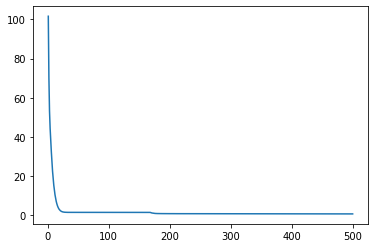

In [ ]:
import matplotlib.pyplot as plt

# 학습 결과에서 loss 값들을 가져온다
loss = h9.history["loss"]

# 반복 수
xaxis = range(1, len(loss)+1)
plt.plot(xaxis, loss)


## 훈련데이터와 테스트 데이터로 분리해서 비교

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4547, 12), (1950, 12), (4547,), (1950,))

In [ ]:
# 신경망 설계
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model11 = Sequential()

# 입력층
model11.add(Dense(units=24, input_dim=12, activation="sigmoid"))
# 은닉층
model11.add(Dense(48, activation="sigmoid"))
model11.add(Dense(24, activation="sigmoid"))
# 출력층, 회귀의 경우 units는 1로, activation은 "linear"를 쓰거나 생략
model11.add(Dense(1))


model11.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 24)                312       
                                                                 
 dense_9 (Dense)             (None, 48)                1200      
                                                                 
 dense_10 (Dense)            (None, 24)                1176      
                                                                 
 dense_11 (Dense)            (None, 1)                 25        
                                                                 
Total params: 2,713
Trainable params: 2,713
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model11.compile(loss='mse', optimizer='adam')

In [ ]:
h11 = model11.fit(X_train,y_train, epochs=500, batch_size=100, validation_data=(X_test, y_test))

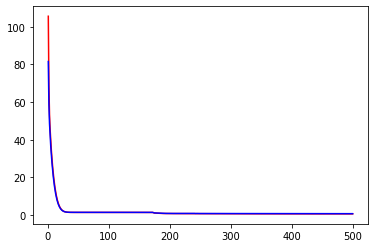

In [ ]:
import matplotlib.pyplot as plt

# 학습 결과에서 loss 값들을 가져온다
loss = h11.history["loss"]
val_loss = h11.history["val_loss"]

# 반복 수
xaxis = range(1, len(loss)+1)
plt.plot(xaxis, loss, "r", label="train")
plt.plot(xaxis, val_loss, "b", label="test")

In [ ]:
score4 = model11.evaluate(X_train, y_train)
score5 = model11.evaluate(X_test, y_test)
print("Train 오차 :", score4, "/", "Test 오차 :", score5)

61/61 [==============================] - 0s 3ms/step - loss: 0.7325
Train 오차 : 0.6130151748657227 / Test 오차 : 0.7325150370597839


## 다진분류

In [ ]:
# 라벨 값을 quality 컬럼 사용

In [ ]:
# 특성 데이터와 라벨데이터로 분리
X1 = data_wine.iloc[:, :-2]
X2 = data_wine.iloc[:, -1]
X = pd.concat([X1, X2], axis=1)
y = data_wine.iloc[:, -2]
y = pd.get_dummies(y)

X.shape, y.shape

((6497, 12), (6497, 7))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4547, 12), (1950, 12), (4547, 7), (1950, 7))

In [ ]:
# 신경망 설계
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model12 = Sequential()

# 입력층
model12.add(Dense(units=24, input_dim=12, activation="softmax"))
# 은닉층
model12.add(Dense(48, activation="softmax"))
model12.add(Dense(24, activation="softmax"))
# 출력층, 회귀의 경우 units는 1로, activation은 "linear"를 쓰거나 생략
model12.add(Dense(7, activation='softmax'))


model12.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 24)                312       
                                                                 
 dense_21 (Dense)            (None, 48)                1200      
                                                                 
 dense_22 (Dense)            (None, 24)                1176      
                                                                 
 dense_23 (Dense)            (None, 7)                 175       
                                                                 
Total params: 2,863
Trainable params: 2,863
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model12.compile(loss="categorical_crossentropy", optimizer="adam", metrics="accuracy")

In [ ]:
h12 = model12.fit(X_train,y_train, epochs=500, batch_size=100, validation_data=(X_test, y_test))

In [ ]:
score6 = model12.evaluate(X_train, y_train)[1]
score7 = model12.evaluate(X_test, y_test)[1]
print("Train 정확도 :", score6, "/", "Test 정확도 :", score7)

61/61 [==============================] - 0s 2ms/step - loss: 1.0927 - accuracy: 0.5282
Train 정확도 : 0.5471739768981934 / Test 정확도 : 0.528205156326294


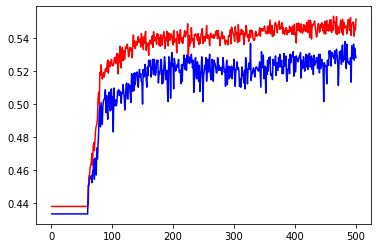

In [ ]:
import matplotlib.pyplot as plt

# 학습 결과에서 accuracy 값들을 가져온다
accuracy = h12.history["accuracy"]
val_accuracy = h12.history["val_accuracy"]

# 반복 수
xaxis = range(1, len(accuracy)+1)
plt.plot(xaxis, accuracy, "r", label="train_accuracy")
plt.plot(xaxis, val_accuracy, "b", label="test_accuracy")

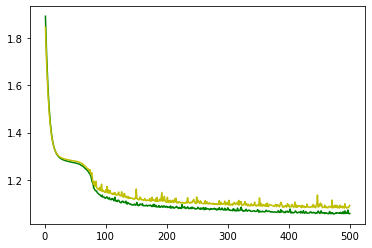

In [ ]:
# 학습 결과에서 loss 값들을 가져온다
loss = h12.history["loss"]
val_loss = h12.history["val_loss"]

# 반복 수
xaxis = range(1, len(loss)+1)
plt.plot(xaxis, loss, "g", label="train_loss")
plt.plot(xaxis, val_loss, "y", label="test_loss")

# [실습3] 보스턴 집값 분석 - 회귀

- CRIM : 인구 1인당 범죄 발생 수
- ZN : 25,000평방 피트 이상의 주거 구역 비중
- INDUS : 소매업 외 상업이 차지하는 면적 비율
- CHAS : 찰스강 위치 변수 (1: 강 주변, 0: 이외)
- NOX : 일산화질소 농도
- RM : 집의 평균 방 수
- AGE : 1940년 이전 지어진 비율
- DIS : 5가지 보스턴 시 고용 시설까지의 거리
- RAD : 순환고속도로의 접근 용이성
- TAX : 10,000달러 당 부동산 세율 총계
- PTRATIO : 지역별 학생과 교사 비율
- B : 지역별 흑인 비율
- LSTAT : 급여가 낮은 직업에 종사하는 인구 비율 (%)
- 가격 (단위 : 1,000달러)

In [ ]:
from tensorflow.keras.datasets import boston_housing
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()
X_train.shape, X_test.shape, y_train.shape, y_test.shape

65536/57026 [==================================] - 0s 0us/step


((404, 13), (102, 13), (404,), (102,))

In [ ]:
# 신경망 설계
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model01 = Sequential()

# 입력층
model01.add(Dense(units=32, input_dim=13, activation="sigmoid"))
# 은닉층
model01.add(Dense(64, activation="sigmoid"))
model01.add(Dense(32, activation="sigmoid"))
# 출력층, 회귀의 경우 units는 1로, activation은 "linear"를 쓰거나 생략
model01.add(Dense(1))


model01.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 32)                448       
                                                                 
 dense_25 (Dense)            (None, 64)                2112      
                                                                 
 dense_26 (Dense)            (None, 32)                2080      
                                                                 
 dense_27 (Dense)            (None, 1)                 33        
                                                                 
Total params: 4,673
Trainable params: 4,673
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model01.compile(loss='mse', optimizer='adam')

In [ ]:
h01=model01.fit(X_train,y_train,epochs=100, batch_size=100, validation_data=(X_test, y_test))

Epoch 1/100
5/5 [==============================] - 0s 33ms/step - loss: 254.0765 - val_loss: 269.7002
Epoch 2/100
5/5 [==============================] - 0s 8ms/step - loss: 252.3808 - val_loss: 267.9476
Epoch 3/100
5/5 [==============================] - 0s 8ms/step - loss: 250.7141 - val_loss: 266.1719
Epoch 4/100
5/5 [==============================] - 0s 8ms/step - loss: 249.0065 - val_loss: 264.4058
Epoch 5/100
5/5 [==============================] - 0s 9ms/step - loss: 247.3633 - val_loss: 262.6545
Epoch 6/100
5/5 [==============================] - 0s 8ms/step - loss: 245.6929 - val_loss: 260.9492
Epoch 7/100
5/5 [==============================] - 0s 12ms/step - loss: 244.0777 - val_loss: 259.2499
Epoch 8/100
5/5 [==============================] - 0s 15ms/step - loss: 242.4578 - val_loss: 257.5656
Epoch 9/100
5/5 [==============================] - 0s 9ms/step - loss: 240.8603 - val_loss: 255.8427
Epoch 10/100
5/5 [==============================] - 0s 9ms/step - loss: 239.2428 - val_l

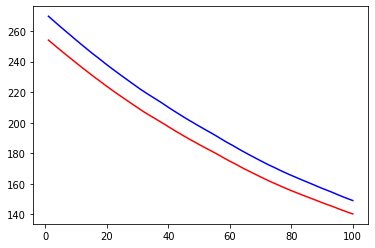

In [ ]:
import matplotlib.pyplot as plt

# 학습 결과에서 accuracy 값들을 가져온다
loss = h01.history["loss"]
val_loss = h01.history["val_loss"]

# 반복 수
xaxis = range(1, len(loss)+1)
plt.plot(xaxis, loss, "r", label="train_loss")
plt.plot(xaxis, val_loss, "b", label="test_loss")

# [실습4] 유방암 데이터 분석 - 이진분류

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [ ]:
X2=cancer.data
y2=cancer.target
X2.shape, y2.shape

((569, 30), (569,))

In [ ]:
cancer.data.shape

(569, 30)

In [ ]:
X_train2, y_train2, X_test2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=777 )

X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape

((398, 30), (398,), (171, 30), (171,))

In [ ]:
from tensorflow._api.v2.config import optimizer
# 신경망 설계
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model02 = Sequential()
#입력층
model02.add(Dense(64, input_dim=30, activation='sigmoid'))
#은닉층
model02.add(Dense(32, activation='sigmoid')) 
model02.add(Dense(16, activation='sigmoid'))
#출력층
model02.add(Dense(1, activation='sigmoid'))  

model02.compile(loss='binary_crossentropy', optimizer='adam', metrics = ["accuracy"])

model02.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 64)                1984      
                                                                 
 dense_41 (Dense)            (None, 32)                2080      
                                                                 
 dense_42 (Dense)            (None, 16)                528       
                                                                 
 dense_43 (Dense)            (None, 1)                 17        
                                                                 
Total params: 4,609
Trainable params: 4,609
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape

((398, 30), (398,), (171, 30), (171,))

In [ ]:
h02 = model02.fit(X_train2, X_test2, epochs=100, batch_size=20, validation_data=(y_train2, y_test2))

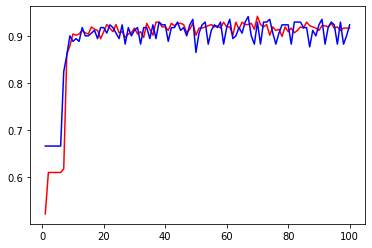

In [ ]:
import matplotlib.pyplot as plt

# 학습 결과에서 accuracy 값들을 가져온다
accuracy = h02.history["accuracy"]
val_accuracy = h02.history["val_accuracy"]

# 반복 수
xaxis = range(1, len(accuracy)+1)
plt.plot(xaxis, accuracy, "r", label="train_accuracy")
plt.plot(xaxis, val_accuracy, "b", label="test_accuracy")

# [실습5] 붓꽃 데이터 분석 - 다중분류

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
X3 = iris.data
y3 = iris.target
y3 = pd.get_dummies(y3)

In [ ]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=777 )

X_train3.shape, X_test3.shape, y_train3.shape, y_test3.shape

((120, 4), (30, 4), (120, 3), (30, 3))

In [ ]:
# 신경망 설계
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model03 = Sequential()

# 입력층
model03.add(Dense(units=8, input_dim=4, activation="softmax"))
# 은닉층
model03.add(Dense(16, activation="softmax"))
model03.add(Dense(8, activation="softmax"))
# 출력층, 회귀의 경우 units는 1로, activation은 "linear"를 쓰거나 생략
model03.add(Dense(3, activation='softmax'))


model03.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 8)                 40        
                                                                 
 dense_57 (Dense)            (None, 16)                144       
                                                                 
 dense_58 (Dense)            (None, 8)                 136       
                                                                 
 dense_59 (Dense)            (None, 3)                 27        
                                                                 
Total params: 347
Trainable params: 347
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model03.compile(loss="categorical_crossentropy", optimizer="adam", metrics="accuracy")

In [ ]:
h03 = model03.fit(X_train3,y_train3, epochs=1000, batch_size=100, validation_data=(X_test3, y_test3))

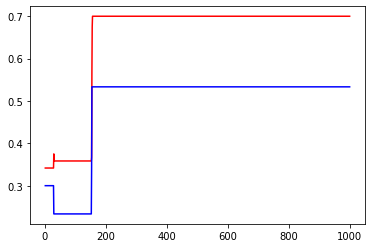

In [ ]:
import matplotlib.pyplot as plt

# 학습 결과에서 accuracy 값들을 가져온다
accuracy = h03.history["accuracy"]
val_accuracy = h03.history["val_accuracy"]

# 반복 수
xaxis = range(1, len(accuracy)+1)
plt.plot(xaxis, accuracy, "r", label="train_accuracy")
plt.plot(xaxis, val_accuracy, "b", label="test_accuracy")